Results are obtained via Metropolis_MC.py file which used LS_Algorithm.py file to calculate an error E

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import networkx as nx
import LS_Algorithm
import pickle
import torch
from scripts import utils
import importlib


# Results
Initial placement is done evenly

```
sensors = np.array([(N_nodes*i)//N_sensors for i in range(N_sensors)])
```

In [14]:
# df25 = pd.read_csv("wandb_export_2022-08-23T23_07_58.967+03_00.csv")
df25 = pd.read_csv("wandb_export_2022-09-12T23_25_49.891+03_00.csv")

In [15]:
# this accepted and rejected are probabilities of accepting / rejecting shift in situation where it shifts to  a free unoccupied location  
df25['accepted']=df25['Statistics/accepted']/(df25['Statistics/accepted']+df25['Statistics/rejected'])

In [16]:
df25.head()

,Name,Agent,State,Notes,User,Tags,Created,Runtime,Sweep,N_sensors,...,E/E,E/Emin,E/acceptance probability,E/random,Statistics/accepted,Statistics/no_neighbors,Statistics/occupied,Statistics/rejected,best step,accepted
0,glorious-sweep-54,w8c9vxpm,finished,-,talking_bird,NaN,2022-09-09T19:31:09.000Z,1828,8iebnehy,200,...,0.007593,0.007101,1.002904,0.109860,2340,0,7571,89,7922,0.963359
1,rose-sweep-53,u4gpwg0i,finished,-,talking_bird,NaN,2022-09-09T19:31:05.000Z,1898,8iebnehy,200,...,0.007204,0.007101,1.018109,0.509513,2333,0,7413,254,5500,0.901817
2,effortless-sweep-54,xo60cfaf,finished,-,talking_bird,NaN,2022-09-09T18:14:19.000Z,3078,8iebnehy,200,...,0.007555,0.007153,1.000084,0.449480,2487,0,7444,69,8624,0.973005
3,deep-sweep-53,qzmtnhgi,finished,-,talking_bird,NaN,2022-09-09T18:13:39.000Z,3075,8iebnehy,200,...,0.007305,0.007120,0.996969,0.863131,2352,0,7477,171,121,0.932224
4,vibrant-sweep-52,y3ch77x8,finished,-,talking_bird,NaN,2022-09-09T18:13:19.000Z,3241,8iebnehy,200,...,0.006900,0.006879,0.976895,0.715192,2033,0,7167,800,6529,0.717614


Results for 284 sensors are: E = 0.0080

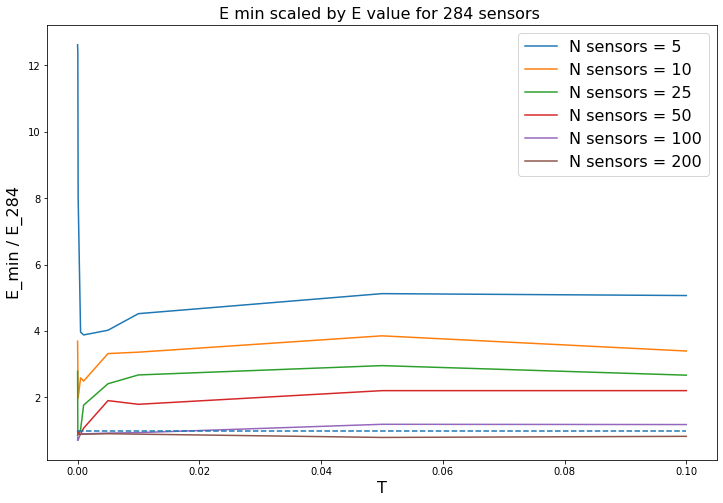

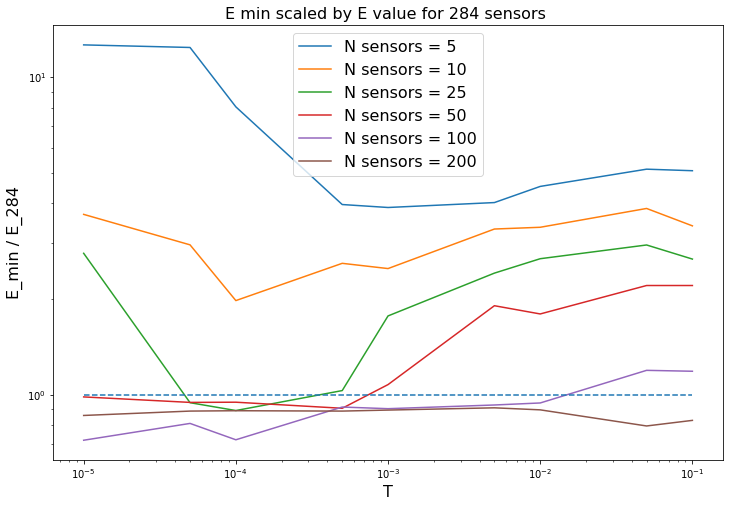

In [62]:
E_max_sensors = 0.0080 # for max number od sensors
ks = 2
G = nx.read_gpickle(f"pore_network_0{ks}.gpickle")
N_sensors_max = G.number_of_nodes()
df25['E_scaled'] = df['E/Emin']/E_max_sensors
for yscale in ['linear', 'log']:
    plt.figure(figsize=(12,8))
    plt.title(f"E min scaled by E value for {N_sensors_max} sensors ", fontsize=16)
    for N_sensors in [5, 10, 25, 50, 100, 200]:
        df_temp =  df[df.N_sensors==N_sensors].sort_values(by=['T'])
        plt.plot(df_temp['T'], df_temp['E_scaled'], label=f'N sensors = {N_sensors}')
    plt.xlabel('T', fontsize=16)
    plt.ylabel(f'E_min / E_{N_sensors_max}', fontsize=16)
    plt.yscale(yscale)
    plt.xscale(yscale)
    plt.legend(fontsize=16)
    plt.hlines(1,1e-5,0.1, linestyles='dashed' )
    plt.show()

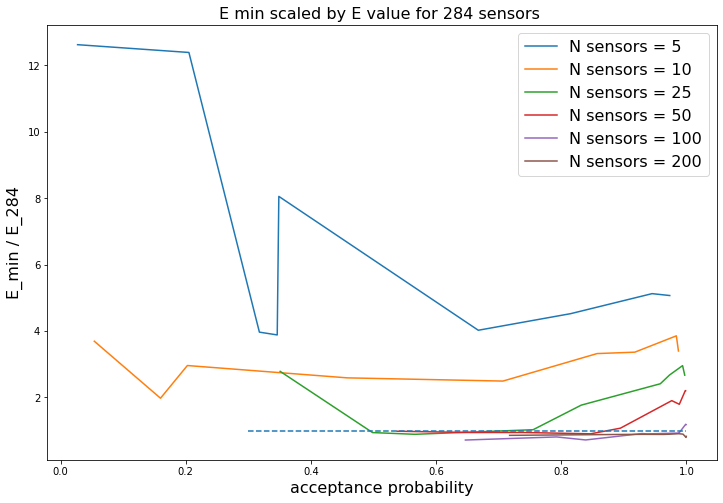

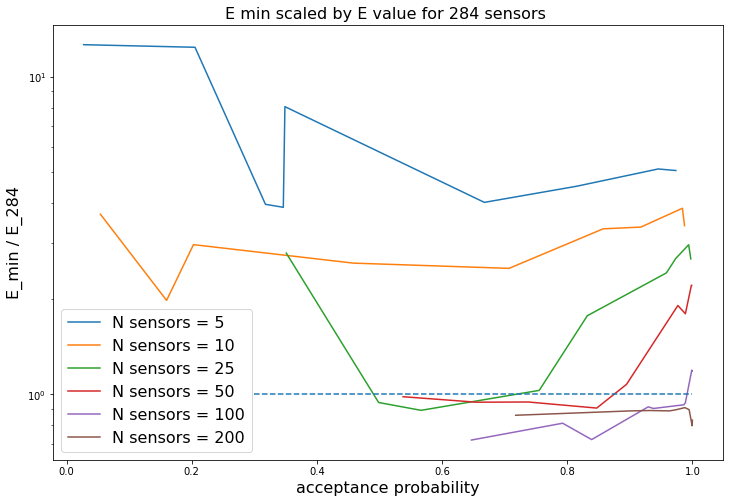

In [20]:
for yscale in ['linear', 'log']:
    plt.figure(figsize=(12,8))
    plt.title(f"E min scaled by E value for {N_sensors_max} sensors ", fontsize=16)
    for N_sensors in [5, 10, 25, 50, 100, 200]:
        df_temp =  df[df.N_sensors==N_sensors].sort_values(by=['accepted'])
        plt.plot(df_temp['accepted'], df_temp['E_scaled'], label=f'N sensors = {N_sensors}')
    plt.xlabel('acceptance probability', fontsize=16)
    plt.ylabel(f'E_min / E_{N_sensors_max}', fontsize=16)
    plt.yscale(yscale)
    plt.legend(fontsize=16)
    plt.hlines(1,0.3,1, linestyles='dashed')
    plt.show()

In [7]:
# Best sensor location for 25 sensors

# df.sort_values('E/Emin')[df.N_sensors==25]['Best sensor location'].iloc[0]

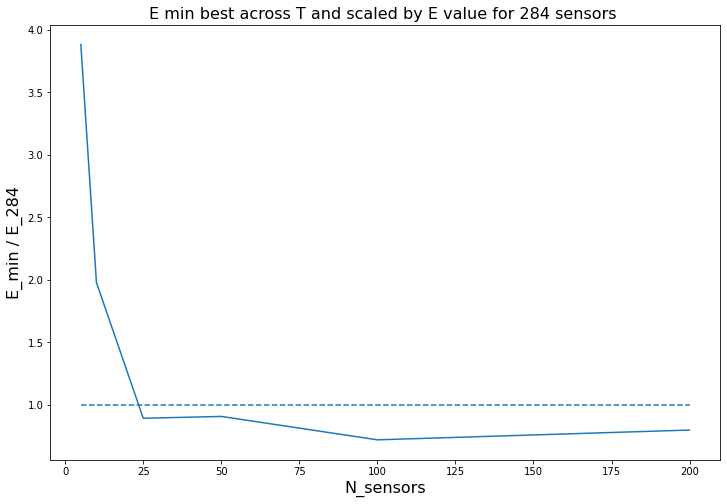

In [22]:
df_temp =  df.groupby(['N_sensors']).min().reset_index()
plt.figure(figsize=(12,8))
plt.title(f"E min best across T and scaled by E value for {N_sensors_max} sensors ", fontsize=16)
plt.plot(df_temp['N_sensors'], df_temp['E_scaled'])
plt.xlabel('N_sensors', fontsize=16)
plt.ylabel(f'E_min / E_{N_sensors_max}', fontsize=16)
# plt.yscale(yscale)
# plt.legend(fontsize=16)
plt.hlines(1,5,200, linestyles='dashed' )
plt.show()

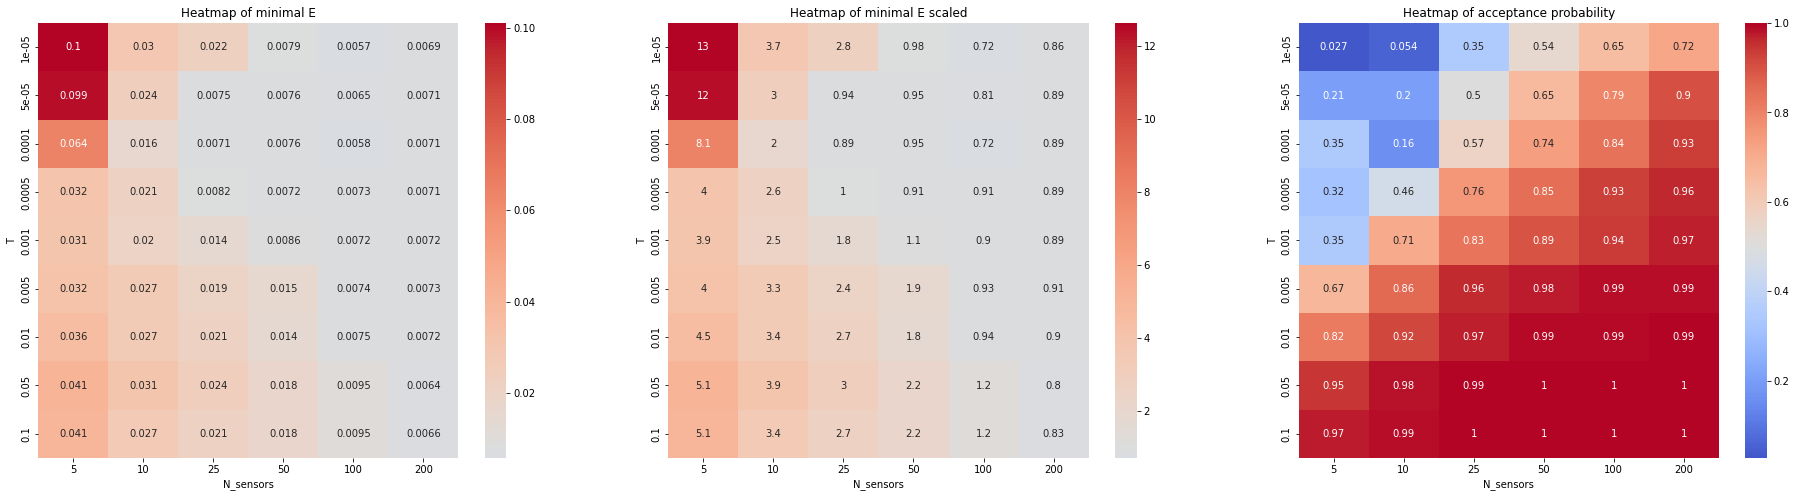

In [64]:
fig, axs = plt.subplots(nrows=1,ncols=3,figsize=(32,8))
df_new = df.pivot(index='T',columns='N_sensors',values='E/Emin')
sns.heatmap(ax=axs[0],data=df_new, annot=True, center=E_max_sensors, cmap='coolwarm')
axs[0].set_title("Heatmap of minimal E")
df_new = df.pivot(index='T',columns='N_sensors',values='E_scaled')
sns.heatmap(ax=axs[1],data=df_new, annot=True, center=1, cmap='coolwarm')
axs[1].set_title("Heatmap of minimal E scaled")
df_new = df.pivot(index='T',columns='N_sensors',values='accepted')
sns.heatmap(ax=axs[2],data=df_new, annot=True, center = 0.5, cmap='coolwarm')
axs[2].set_title("Heatmap of acceptance probability")
plt.show()

## Results for 25 sensors

initial placement is done by: 
```
    rng_gen = np.random.RandomState(random_state)
    sensors = rng_gen.choice(np.arange(N_nodes), N_sensors)
```

In [60]:
df25 = pd.read_csv('wandb_export_2022-09-12T23_38_22.248+03_00.csv')
df25['accepted']=df25['Statistics/accepted']/(df25['Statistics/accepted']+df25['Statistics/rejected'])

In [34]:
df_temp_min =  df25.groupby(['T']).min().reset_index()
df_temp

,T,Name,Agent,State,Notes,User,Tags,Created,Runtime,Sweep,...,E/E,E/Emin,E/acceptance probability,E/random,Statistics/accepted,Statistics/no_neighbors,Statistics/occupied,Statistics/rejected,best step,E_scaled
0,0.00001,gentle-sweep-5,1ffxco4f,finished,-,talking_bird,NaN,2022-09-09T20:25:21.000Z,4516,psg188td,...,0.019851,0.019782,0.000000e+00,0.156672,2282,0,140,4785,2766,2.472742
1,0.00005,astral-sweep-7,07itxcfn,finished,-,talking_bird,NaN,2022-09-09T20:26:39.000Z,4687,psg188td,...,0.008430,0.008172,0.000000e+00,0.220704,4451,0,634,3801,6933,1.021444
2,0.00010,bright-sweep-14,07itxcfn,finished,-,talking_bird,NaN,2022-09-09T23:18:10.000Z,4768,psg188td,...,0.007908,0.007574,2.952294e-19,0.062978,4532,0,866,3557,7244,0.946727
3,0.00050,firm-sweep-20,07itxcfn,finished,-,talking_bird,NaN,2022-09-10T00:44:15.000Z,4880,psg188td,...,0.009079,0.007725,3.974733e-03,0.333418,6497,0,871,2245,7011,0.965591
4,0.00100,avid-sweep-22,07itxcfn,finished,-,talking_bird,NaN,2022-09-10T03:11:22.000Z,3563,psg188td,...,0.013837,0.009616,2.543680e-03,0.132952,7602,0,839,1206,3040,1.201941


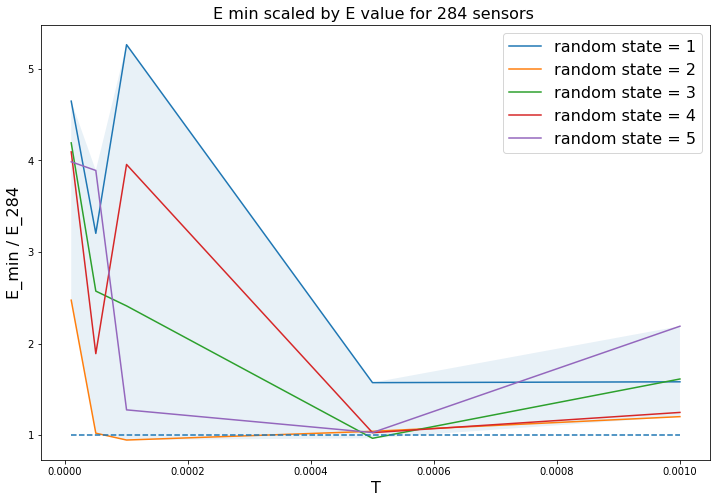

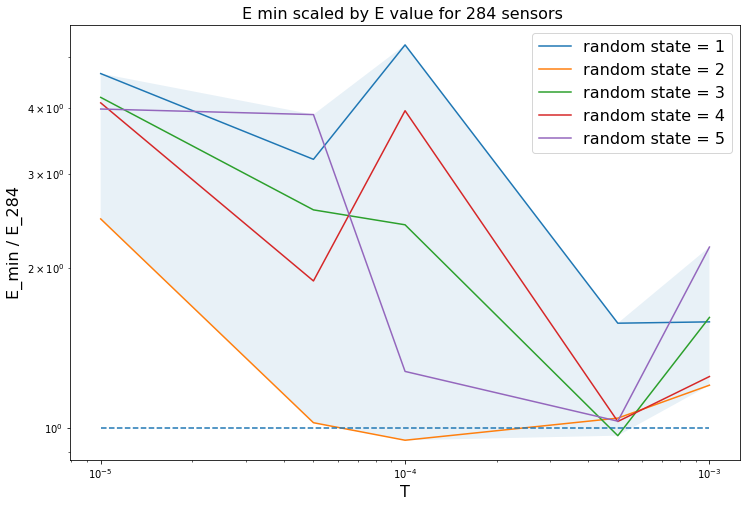

In [56]:
E_max_sensors = 0.0080 # for max number od sensors
ks = 2
G = nx.read_gpickle(f"pore_network_0{ks}.gpickle")
N_sensors_max = G.number_of_nodes()
df25['E_scaled'] = df25['E/Emin']/E_max_sensors
for yscale in ['linear', 'log']:
    plt.figure(figsize=(12,8))
    plt.title(f"E min scaled by E value for {N_sensors_max} sensors ", fontsize=16)
    N_sensors = 25
    for i in sorted(df25['random_state'].unique()):
        df_temp =  df25[df25.N_sensors==N_sensors][df25.random_state==i].sort_values(by=['T'])
        plt.plot(df_temp['T'], df_temp['E_scaled'], label=f'random state = {i}')
    
    df_temp_min =  df25.groupby(['T']).min().reset_index()
    df_temp_max =  df25.groupby(['T']).max().reset_index()

    plt.fill_between(df_temp['T'].unique(), df_temp_min['E_scaled'], df_temp_max['E_scaled'], alpha=0.1)
    plt.xlabel('T', fontsize=16)
    plt.ylabel(f'E_min / E_{N_sensors_max}', fontsize=16)
    plt.yscale(yscale)
    plt.xscale(yscale)
    plt.legend(fontsize=16)
    plt.hlines(1,df_temp['T'].min(),df_temp['T'].max(), linestyles='dashed' )
    plt.show()

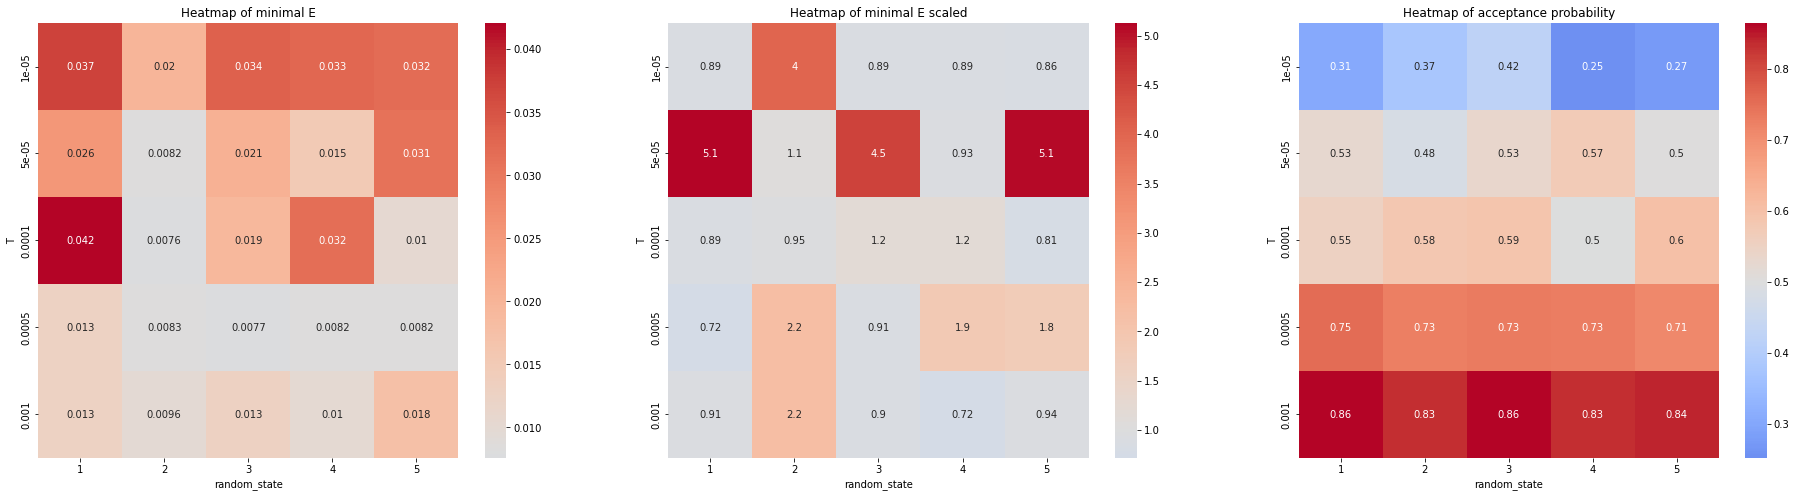

In [63]:
fig, axs = plt.subplots(nrows=1,ncols=3,figsize=(32,8))
df_new = df25.pivot(index='T',columns='random_state',values='E/Emin')
sns.heatmap(ax=axs[0],data=df_new, annot=True, center=E_max_sensors, cmap='coolwarm')
axs[0].set_title("Heatmap of minimal E")
df_new = df25.pivot(index='T',columns='random_state',values='E_scaled')
sns.heatmap(ax=axs[1],data=df_new, annot=True, center=1, cmap='coolwarm')
axs[1].set_title("Heatmap of minimal E scaled")
df_new = df25.pivot(index='T',columns='random_state',values='accepted')
sns.heatmap(ax=axs[2],data=df_new, annot=True, center = 0.5, cmap='coolwarm')
axs[2].set_title("Heatmap of acceptance probability")
plt.show()